<a href="https://colab.research.google.com/github/assemzh/ProbProg-COVID-19/blob/master/virus_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

hygiene = 0.25    #parameters to be infered
distancing = 0.7
isolate = 0.25
quarantine = 0.25
masks = 0.25

hospital_cap = 2* 1/3400
transmission_days = 4
exposed_days = 3
recovery_days = 10
waning_days = 365

susceptible0 = 0.9999
infected0 = 0.0001 
exposed0 = 0
recovered0 = 0

def virus_model(days):
  transmission_rate = (1/ transmission_days)
  incubation_rate = (1/  exposed_days)
  recovery_rate = (1/ recovery_days)
  immunity_loss_rate = (1/ waning_days)
  death_rate_with_med = 0.3
  death_rate_without_med = 0.9
  ser_case_rate = 0.15


  r0 = ( transmission_rate / recovery_rate)

  susceptible = susceptible0 
  infected = infected0
  exposed = exposed0
  recovered = recovered0
  dead = 0

  susc= [susceptible0]
  exp = [exposed0]
  inf = [infected0]
  rec = [recovered0]
  re = [r0]
  d = [0]
  #transmission_rate = transmission_rate * (1- hygiene) * (1- distancing) * (1- isolate) * (1- quarantine) * (1- masks)
  
  for day in range(days):
    susceptible -= susceptible * infected * transmission_rate 
    exposed +=  susceptible * infected * transmission_rate
    exposed -= exposed * incubation_rate

    infected += exposed * incubation_rate 
    infected -= infected * recovery_rate

    if (ser_case_rate*exposed * incubation_rate < hospital_cap):
      dead += ser_case_rate*exposed * incubation_rate * death_rate_with_med
      infected -= ser_case_rate*exposed * incubation_rate * death_rate_with_med
    else:
      dead += hospital_cap*death_rate_with_med + (exposed * incubation_rate * ser_case_rate - hospital_cap) * death_rate_without_med
      infected -= hospital_cap*death_rate_with_med + (exposed * incubation_rate * ser_case_rate - hospital_cap) * death_rate_without_med

    

    recovered += infected * recovery_rate
    recovered -= recovered * immunity_loss_rate

    susceptible += recovered * immunity_loss_rate

    susc.append(susceptible)
    exp.append(exposed)
    inf.append(infected)
    rec.append(recovered)
    d.append(dead)
  
  return susc, exp, inf, rec, d


[0.9999, 0.9998750283876217, 0.9998513952064328, 0.9998282400195135, 0.9998050533616178, 0.9997815291302176, 0.9997574789051912, 0.9997327822095381, 0.9997073576291942, 0.9996811460388435, 0.9996541008535762, 0.9996261823579168, 0.9995973544009382, 0.9995675824642228, 0.9995368325261853, 0.9995050703881542, 0.9994722612679898, 0.9994383695485041, 0.9994033586152301, 0.9993671907455458, 0.9993298270270766, 0.9992912272925562, 0.9992513500636844, 0.999210152499639, 0.9991675903477031, 0.9991236178945189, 0.9990781879170886, 0.999031251632993, 0.9989827586495049, 0.9989326569113933, 0.9988808926472802, 0.9988274103144537, 0.9987721525420625, 0.998715060072632, 0.9986560717018443, 0.9985951242165356, 0.9985321523308597, 0.9984670886205733, 0.9983998634553944, 0.9983304049293893, 0.99825863878934, 0.998184488361048, 0.9981078744735264, 0.9980287153810344, 0.9979469266829093, 0.997862421241148, 0.9977751090956943, 0.9976848973773865, 0.9975916902185185, 0.9974953886609739, 0.9973958905618879

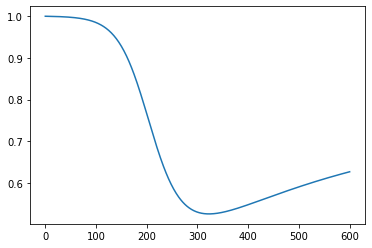

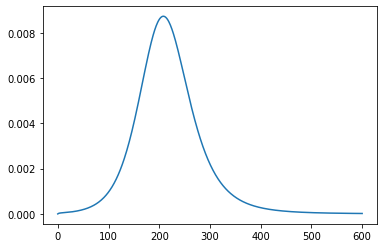

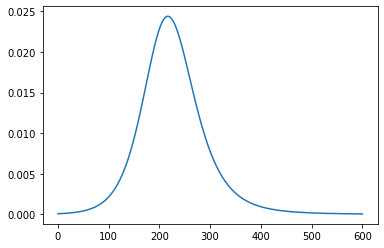

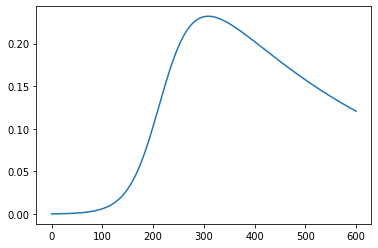

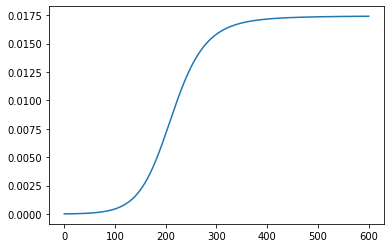

In [0]:
days = 600

result = virus_model(days)
for i in result:
  print(i)
m = [m for m in range(days+1)]

plt.plot(m, result[0], label="line S")
plt.plot()
plt.show()

plt.plot(m, result[1], label="line E")
plt.plot()
plt.show()

plt.plot(m, result[2], label="line I")
plt.plot()
plt.show()

plt.plot(m, result[3], label="line R")
plt.plot()
plt.show()

plt.plot(m, result[4], label="line D")
plt.plot()
plt.show()